# Robustness of Air Transport Networks in the World: Case of Turkey against USA and China
### with OpenFlights 2017 Data

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

## Airport Database

In [2]:
# Import libraries
import pandas as pd
import numpy as np

airports_df = pd.read_csv("airports.csv", header=0, sep=",")
#airports_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/48002/project/airports.csv",encoding='latin-1')

In [3]:
airports_df.head(700)

,airport_id,name,city,country,iata,icao,latitude,longitude,altitude,timezone,dst,tz_database_time_zone,type,source
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,706,Anderstorp Airport,Anderstorp,Sweden,\N,ESMP,57.264198,13.599400,507,1,E,Europe/Stockholm,airport,OurAirports
696,707,Kalmar Airport,Kalkmar,Sweden,KLR,ESMQ,56.685501,16.287600,17,1,E,Europe/Stockholm,airport,OurAirports
697,708,Malmö Sturup Airport,Malmoe,Sweden,MMX,ESMS,55.536305,13.376198,236,1,E,Europe/Stockholm,airport,OurAirports
698,709,Halmstad Airport,Halmstad,Sweden,HAD,ESMT,56.691101,12.820200,101,1,E,Europe/Stockholm,airport,OurAirports


In [4]:
airports_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7698 entries, 0 to 7697
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   airport_id             7698 non-null   int64  
 1   name                   7698 non-null   object 
 2   city                   7649 non-null   object 
 3   country                7698 non-null   object 
 4   iata                   7698 non-null   object 
 5   icao                   7698 non-null   object 
 6   latitude               7698 non-null   float64
 7   longitude              7698 non-null   float64
 8   altitude               7698 non-null   int64  
 9   timezone               7698 non-null   object 
 10  dst                    7698 non-null   object 
 11  tz_database_time_zone  7698 non-null   object 
 12  type                   7698 non-null   object 
 13  source                 7698 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 842.1+

In [5]:
airports_df.fillna(value="BUG", inplace=True)

In [6]:
airports_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7698 entries, 0 to 7697
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   airport_id             7698 non-null   int64  
 1   name                   7698 non-null   object 
 2   city                   7698 non-null   object 
 3   country                7698 non-null   object 
 4   iata                   7698 non-null   object 
 5   icao                   7698 non-null   object 
 6   latitude               7698 non-null   float64
 7   longitude              7698 non-null   float64
 8   altitude               7698 non-null   int64  
 9   timezone               7698 non-null   object 
 10  dst                    7698 non-null   object 
 11  tz_database_time_zone  7698 non-null   object 
 12  type                   7698 non-null   object 
 13  source                 7698 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 842.1+

In [7]:
city_bug_index = airports_df[airports_df["city"] == "BUG"].index

In [8]:
airports_df.drop(city_bug_index, inplace = True)

In [9]:
airports_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7649 entries, 0 to 7697
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   airport_id             7649 non-null   int64  
 1   name                   7649 non-null   object 
 2   city                   7649 non-null   object 
 3   country                7649 non-null   object 
 4   iata                   7649 non-null   object 
 5   icao                   7649 non-null   object 
 6   latitude               7649 non-null   float64
 7   longitude              7649 non-null   float64
 8   altitude               7649 non-null   int64  
 9   timezone               7649 non-null   object 
 10  dst                    7649 non-null   object 
 11  tz_database_time_zone  7649 non-null   object 
 12  type                   7649 non-null   object 
 13  source                 7649 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 896.4+

In [10]:
#airports_df.head(20)

### Output for better view in xlsx

In [11]:
# airports_df.to_excel("aiports.xlsx", index=False)

## Routes Database

In [12]:
routes_df = pd.read_csv("routes.csv", header=0, sep=",")
#routes_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/48002/project/routes.csv",encoding='latin-1')

In [13]:
routes_df.head(15)

,airline,airline_id,source_airport,source_airport_id,destination_airport,destination_airport_id,codeshare,stops,equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2
5,2B,410,DME,4029,KZN,2990,NaN,0,CR2
6,2B,410,DME,4029,NBC,6969,NaN,0,CR2
7,2B,410,DME,4029,TGK,\N,NaN,0,CR2
8,2B,410,DME,4029,UUA,6160,NaN,0,CR2
9,2B,410,EGO,6156,KGD,2952,NaN,0,CR2


In [14]:
routes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67663 entries, 0 to 67662
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   airline                 67663 non-null  object
 1   airline_id              67663 non-null  object
 2   source_airport          67663 non-null  object
 3   source_airport_id       67663 non-null  object
 4   destination_airport     67663 non-null  object
 5   destination_airport_id  67663 non-null  object
 6   codeshare               14597 non-null  object
 7   stops                   67663 non-null  int64 
 8   equipment               67645 non-null  object
dtypes: int64(1), object(8)
memory usage: 4.6+ MB


In [15]:
#routes_df.to_excel("routes.xlsx", index=False)

In [16]:
edge_routes_df = routes_df[["source_airport", "destination_airport"]]

In [17]:
edge_routes_df.head(15)

,source_airport,destination_airport
0,AER,KZN
1,ASF,KZN
2,ASF,MRV
3,CEK,KZN
4,CEK,OVB
5,DME,KZN
6,DME,NBC
7,DME,TGK
8,DME,UUA
9,EGO,KGD


In [18]:
nodes_df = airports_df[["name","city","country","iata"]]

In [19]:
nodes_df.head(15)

,name,city,country,iata
0,Goroka Airport,Goroka,Papua New Guinea,GKA
1,Madang Airport,Madang,Papua New Guinea,MAG
2,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU
3,Nadzab Airport,Nadzab,Papua New Guinea,LAE
4,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM
5,Wewak International Airport,Wewak,Papua New Guinea,WWK
6,Narsarsuaq Airport,Narssarssuaq,Greenland,UAK
7,Godthaab / Nuuk Airport,Godthaab,Greenland,GOH
8,Kangerlussuaq Airport,Sondrestrom,Greenland,SFJ
9,Thule Air Base,Thule,Greenland,THU


In [20]:
merged_df = pd.merge(edge_routes_df, nodes_df, how="left",left_on="source_airport", right_on="iata")

In [21]:
merged_df.head(15)

,source_airport,destination_airport,name,city,country,iata
0,AER,KZN,Sochi International Airport,Sochi,Russia,AER
1,ASF,KZN,Astrakhan Airport,Astrakhan,Russia,ASF
2,ASF,MRV,Astrakhan Airport,Astrakhan,Russia,ASF
3,CEK,KZN,Chelyabinsk Balandino Airport,Chelyabinsk,Russia,CEK
4,CEK,OVB,Chelyabinsk Balandino Airport,Chelyabinsk,Russia,CEK
5,DME,KZN,Domodedovo International Airport,Moscow,Russia,DME
6,DME,NBC,Domodedovo International Airport,Moscow,Russia,DME
7,DME,TGK,Domodedovo International Airport,Moscow,Russia,DME
8,DME,UUA,Domodedovo International Airport,Moscow,Russia,DME
9,EGO,KGD,Belgorod International Airport,Belgorod,Russia,EGO


In [22]:
merged_df.drop(columns=["iata"], inplace=True)

In [23]:
merged_df.rename(columns={"name":"source_airport_name", "city":"source_aiport_city", "country":"source_airport_country"}, inplace=True)

In [24]:
merged_df.head(30)

,source_airport,destination_airport,source_airport_name,source_aiport_city,source_airport_country
0,AER,KZN,Sochi International Airport,Sochi,Russia
1,ASF,KZN,Astrakhan Airport,Astrakhan,Russia
2,ASF,MRV,Astrakhan Airport,Astrakhan,Russia
3,CEK,KZN,Chelyabinsk Balandino Airport,Chelyabinsk,Russia
4,CEK,OVB,Chelyabinsk Balandino Airport,Chelyabinsk,Russia
5,DME,KZN,Domodedovo International Airport,Moscow,Russia
6,DME,NBC,Domodedovo International Airport,Moscow,Russia
7,DME,TGK,Domodedovo International Airport,Moscow,Russia
8,DME,UUA,Domodedovo International Airport,Moscow,Russia
9,EGO,KGD,Belgorod International Airport,Belgorod,Russia


In [25]:
merged_df = pd.merge(merged_df, nodes_df, how="left", left_on="destination_airport", right_on="iata")

In [26]:
#merged_df.head(15)

In [27]:
merged_df.drop(columns=["iata"], inplace=True)
merged_df.rename(columns={"name":"destination_airport_name", "city":"destination_aiport_city", "country":"destination_airport_country"}, inplace=True)

In [28]:
#merged_df.head(15)

In [29]:
merged_df.rename(columns={"source_airport":"source_airport_iata", "destination_airport":"destination_airport_iata",}, inplace=True)

In [30]:
merged_df.head(10)

,source_airport_iata,destination_airport_iata,source_airport_name,source_aiport_city,source_airport_country,destination_airport_name,destination_aiport_city,destination_airport_country
0,AER,KZN,Sochi International Airport,Sochi,Russia,Kazan International Airport,Kazan,Russia
1,ASF,KZN,Astrakhan Airport,Astrakhan,Russia,Kazan International Airport,Kazan,Russia
2,ASF,MRV,Astrakhan Airport,Astrakhan,Russia,Mineralnyye Vody Airport,Mineralnye Vody,Russia
3,CEK,KZN,Chelyabinsk Balandino Airport,Chelyabinsk,Russia,Kazan International Airport,Kazan,Russia
4,CEK,OVB,Chelyabinsk Balandino Airport,Chelyabinsk,Russia,Tolmachevo Airport,Novosibirsk,Russia
5,DME,KZN,Domodedovo International Airport,Moscow,Russia,Kazan International Airport,Kazan,Russia
6,DME,NBC,Domodedovo International Airport,Moscow,Russia,Begishevo Airport,Nizhnekamsk,Russia
7,DME,TGK,Domodedovo International Airport,Moscow,Russia,Taganrog Yuzhny Airport,Taganrog,Russia
8,DME,UUA,Domodedovo International Airport,Moscow,Russia,Bugulma Airport,Bugulma,Russia
9,EGO,KGD,Belgorod International Airport,Belgorod,Russia,Khrabrovo Airport,Kaliningrad,Russia


## Turkey Network

In [31]:
merged_df_source_turkey = merged_df[merged_df["source_airport_country"] == "Turkey"]
turkey_network = merged_df_source_turkey[merged_df_source_turkey["destination_airport_country"] == "Turkey"]

In [32]:
turkey_network.head(10)

,source_airport_iata,destination_airport_iata,source_airport_name,source_aiport_city,source_airport_country,destination_airport_name,destination_aiport_city,destination_airport_country
3239,ADA,IST,Adana Airport,Adana,Turkey,Istanbul Airport,Istanbul,Turkey
3240,ADB,IST,Adnan Menderes International Airport,Izmir,Turkey,Istanbul Airport,Istanbul,Turkey
3241,AYT,IST,Antalya International Airport,Antalya,Turkey,Istanbul Airport,Istanbul,Turkey
3244,BJV,IST,Milas Bodrum International Airport,Bodrum,Turkey,Istanbul Airport,Istanbul,Turkey
3246,DIY,IST,Diyarbakir Airport,Diyabakir,Turkey,Istanbul Airport,Istanbul,Turkey
3247,DLM,IST,Dalaman International Airport,Dalaman,Turkey,Istanbul Airport,Istanbul,Turkey
3249,ERZ,IST,Erzurum International Airport,Erzurum,Turkey,Istanbul Airport,Istanbul,Turkey
3250,EZS,IST,Elazığ Airport,Elazig,Turkey,Istanbul Airport,Istanbul,Turkey
3251,GNY,IST,Şanlıurfa GAP Airport,Sanliurfa,Turkey,Istanbul Airport,Istanbul,Turkey
3252,GZP,IST,Gazipaşa Airport,Alanya,Turkey,Istanbul Airport,Istanbul,Turkey


In [33]:
turkey_network.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306 entries, 3239 to 65546
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   source_airport_iata          306 non-null    object
 1   destination_airport_iata     306 non-null    object
 2   source_airport_name          306 non-null    object
 3   source_aiport_city           306 non-null    object
 4   source_airport_country       306 non-null    object
 5   destination_airport_name     306 non-null    object
 6   destination_aiport_city      306 non-null    object
 7   destination_airport_country  306 non-null    object
dtypes: object(8)
memory usage: 21.5+ KB


In [34]:
turkey_network.drop_duplicates(inplace=True)

<ipython-input-34-07448b3fcd8c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  turkey_network.drop_duplicates(inplace=True)


In [35]:
#turkey_network.head(15)

In [36]:
#turkey_network.info()

In [37]:
#turkey_network.to_excel("turkey_network.xlsx", index=False)

In [38]:
#turkey_network["source_airport_name"].value_counts()

In [39]:
#len(turkey_network["source_airport_name"].value_counts())

In [40]:
#turkey_network["destination_airport_name"].value_counts()

In [41]:
initial_list = list()

for row in turkey_network.itertuples():
    if (((row.source_aiport_city, row.destination_aiport_city) in initial_list) or ((row.destination_aiport_city, row.source_aiport_city) in initial_list)):
        pass
    else:
        initial_list.append((row.source_aiport_city, row.destination_aiport_city))
print(initial_list)

[('Adana', 'Istanbul'), ('Izmir', 'Istanbul'), ('Antalya', 'Istanbul'), ('Bodrum', 'Istanbul'), ('Diyabakir', 'Istanbul'), ('Dalaman', 'Istanbul'), ('Erzurum', 'Istanbul'), ('Elazig', 'Istanbul'), ('Sanliurfa', 'Istanbul'), ('Alanya', 'Istanbul'), ('Gaziantep', 'Istanbul'), ('Istanbul', 'Malatya'), ('Istanbul', 'Trabzon'), ('Ankara', 'Istanbul'), ('Bodrum', 'Izmir'), ('Adana', 'Izmir'), ('Adana', 'Antalya'), ('Adana', 'Trabzon'), ('Adana', 'Van'), ('Izmir', 'Kayseri'), ('Izmir', 'Antalya'), ('Izmir', 'Diyabakir'), ('Izmir', 'Ankara'), ('Izmir', 'Elazig'), ('Izmir', 'Sanliurfa'), ('Izmir', 'Gaziantep'), ('Izmir', 'Hatay'), ('Izmir', 'Mardin'), ('Izmir', 'Trabzon'), ('Izmir', 'Sivas'), ('Kayseri', 'Istanbul'), ('Antalya', 'Trabzon'), ('Batman', 'Istanbul'), ('Bodrum', 'Ankara'), ('Denizli', 'Istanbul'), ('Balikesir Korfez', 'Istanbul'), ('Erzincan', 'Istanbul'), ('Hatay', 'Istanbul'), ('Kahramanmaras', 'Istanbul'), ('Konya', 'Istanbul'), ('Mardin', 'Istanbul'), ('Mus', 'Istanbul'), ('Mer

In [42]:
unique_turkey_edges = pd.DataFrame(initial_list, columns=["from","to"])

In [43]:
#unique_turkey_edges.head(15)

In [44]:
#unique_turkey_edges.info()

In [45]:
unique_turkey_edges.replace(to_replace="Balikesir Korfez", value="Balikesir",inplace=True)
unique_turkey_edges.replace(to_replace="Merzifon", value="Amasya",inplace=True)
unique_turkey_edges.replace(to_replace="Topel", value="Kocaeli",inplace=True)
unique_turkey_edges.replace(to_replace="Ãorlu", value="Corlu",inplace=True)

In [46]:
#unique_turkey_edges.to_excel("unique_turkey_edges.xlsx", index=False)

In [47]:
unique_turkey_edges

,from,to
0,Adana,Istanbul
1,Izmir,Istanbul
2,Antalya,Istanbul
3,Bodrum,Istanbul
4,Diyabakir,Istanbul
...,...,...
75,Isparta,Istanbul
76,Istanbul,Kastamonu
77,Istanbul,Kars
78,Istanbul,Kutahya


In [48]:
unique_turkey_edges["to"].unique()

array(['Istanbul', 'Malatya', 'Trabzon', 'Izmir', 'Antalya', 'Van',
       'Kayseri', 'Diyabakir', 'Ankara', 'Elazig', 'Sanliurfa',
       'Gaziantep', 'Hatay', 'Mardin', 'Sivas', 'Alanya', 'Igdir',
       'Kahramanmaras', 'Kocaeli', 'Kars', 'Mus', 'Çorlu', 'Kastamonu',
       'Kutahya', 'Sinop'], dtype=object)

In [49]:
unique_turkey_nodes_list = [node for node in unique_turkey_edges["from"].unique()]

In [50]:
for node in unique_turkey_edges["to"].unique():
    if node in unique_turkey_nodes_list:
        pass
    else:
        unique_turkey_nodes_list.append(node)
unique_turkey_nodes_list.sort()
unique_turkey_nodes = pd.DataFrame(unique_turkey_nodes_list, columns=["nodes"])

In [51]:
unique_turkey_nodes.head(10)

,nodes
0,Adana
1,Adiyaman
2,Agri
3,Alanya
4,Amasya
5,Ankara
6,Antalya
7,Balikesir
8,Batman
9,Bingol


In [52]:
unique_turkey_nodes.reset_index(inplace=True)

In [53]:
unique_turkey_nodes

,index,nodes
0,0,Adana
1,1,Adiyaman
2,2,Agri
3,3,Alanya
4,4,Amasya
5,5,Ankara
6,6,Antalya
7,7,Balikesir
8,8,Batman
9,9,Bingol


In [54]:
unique_turkey_nodes.replace(to_replace="Balikesir Korfez", value="Balikesir",inplace=True)
unique_turkey_nodes.replace(to_replace="Merzifon", value="Amasya",inplace=True)
unique_turkey_nodes.replace(to_replace="Topel", value="Kocaeli",inplace=True)
unique_turkey_nodes.replace(to_replace="Ãorlu", value="Corlu",inplace=True)

In [55]:
#unique_turkey_nodes.to_excel("unique_turkey_nodes.xlsx", index=False)

# Network X

In [56]:
#from libpysal import weights
import matplotlib.pyplot as plt
import networkx as nx
#import geopandas
import numpy as np

In [57]:
def provide_network_data(dataframe):
    subset = dataframe[["from", "to"]]
    tuples = [tuple(x) for x in subset.to_numpy()]

    #print(tuples)
    return tuples

In [58]:
def create_turkey_network():
  merged_df_source_turkey = merged_df[merged_df["source_airport_country"] == "Turkey"]
  turkey_network = merged_df_source_turkey[merged_df_source_turkey["destination_airport_country"] == "Turkey"]
  turkey_network.drop_duplicates(inplace=True)

  initial_list = list()

  for row in turkey_network.itertuples():
      if (((row.source_aiport_city, row.destination_aiport_city) in initial_list) or ((row.destination_aiport_city, row.source_aiport_city) in initial_list)):
          pass
      else:
          initial_list.append((row.source_aiport_city, row.destination_aiport_city))
  #print(initial_list)
  unique_turkey_edges = pd.DataFrame(initial_list, columns=["from","to"])
  unique_turkey_edges.replace(to_replace="Balikesir Korfez", value="Balikesir",inplace=True)
  unique_turkey_edges.replace(to_replace="Merzifon", value="Amasya",inplace=True)
  unique_turkey_edges.replace(to_replace="Topel", value="Kocaeli",inplace=True)
  unique_turkey_edges.replace(to_replace="Ãorlu", value="Corlu",inplace=True)

  unique_turkey_edges["to"].unique()
  unique_turkey_nodes_list = [node for node in unique_turkey_edges["from"].unique()]
  for node in unique_turkey_edges["to"].unique():
      if node in unique_turkey_nodes_list:
          pass
      else:
          unique_turkey_nodes_list.append(node)
  unique_turkey_nodes_list.sort()
  unique_turkey_nodes = pd.DataFrame(unique_turkey_nodes_list, columns=["nodes"])
  unique_turkey_nodes.reset_index(inplace=True)

  unique_turkey_nodes.replace(to_replace="Balikesir Korfez", value="Balikesir",inplace=True)
  unique_turkey_nodes.replace(to_replace="Merzifon", value="Amasya",inplace=True)
  unique_turkey_nodes.replace(to_replace="Topel", value="Kocaeli",inplace=True)
  unique_turkey_nodes.replace(to_replace="Ãorlu", value="Corlu",inplace=True)
  G = nx.Graph()

  for ou, cu in provide_network_data(unique_turkey_edges):
    G.add_edge(ou, cu)
  return unique_turkey_nodes, G

'''print(f"Nodes: {nx.number_of_nodes(G)}")
print(f"Edges: {nx.number_of_edges(G)}")
print(f"Density: {nx.density(G)}")
print(f"Radius: {nx.radius(G)}")
print(f"Diameter: {nx.diameter(G)}")
print(f"Eccentricity: {nx.eccentricity(G)}")
print(f"Center: {nx.center(G)}")
print(f"Periphery: {nx.periphery(G)}")'''

#print(nx.info(graph))

'print(f"Nodes: {nx.number_of_nodes(G)}")\nprint(f"Edges: {nx.number_of_edges(G)}")\nprint(f"Density: {nx.density(G)}")\nprint(f"Radius: {nx.radius(G)}")\nprint(f"Diameter: {nx.diameter(G)}")\nprint(f"Eccentricity: {nx.eccentricity(G)}")\nprint(f"Center: {nx.center(G)}")\nprint(f"Periphery: {nx.periphery(G)}")'

In [59]:
# Export to Gexf file.
#nx.write_gexf(graph, "turkey_airtransport_network.gexf")

## United States Network

In [60]:
def create_usa_network():  
  merged_df_source_usa = merged_df[merged_df["source_airport_country"] == "United States"]
  usa_network = merged_df_source_usa[merged_df_source_usa["destination_airport_country"] == "United States"]
  usa_network.drop_duplicates(inplace=True)

  usa_network["source_airport_name"].value_counts()

  initial_list_usa = list()

  for row in usa_network.itertuples():
      if (((row.source_aiport_city, row.destination_aiport_city) in initial_list_usa) or ((row.destination_aiport_city, row.source_aiport_city) in initial_list_usa)):
          pass
      else:
          initial_list_usa.append((row.source_aiport_city, row.destination_aiport_city))
  #print(initial_list_usa)

  unique_usa_edges = pd.DataFrame(initial_list_usa, columns=["from","to"])


  unique_usa_nodes_list = [node for node in unique_usa_edges["from"].unique()]

  for node in unique_usa_edges["to"].unique():
      if node in unique_usa_nodes_list:
          pass
      else:
          unique_usa_nodes_list.append((node))
  
  unique_usa_nodes_list.sort()
  unique_usa_nodes = pd.DataFrame(unique_usa_nodes_list, columns=["nodes"])
  unique_usa_nodes.reset_index(inplace=True)

  G2 = nx.Graph()

  for ou, cu in provide_network_data(unique_usa_edges):
    G2.add_edge(ou, cu)

  print(f"Nodes: {nx.number_of_nodes(G2)}")
  print(f"Edges: {nx.number_of_edges(G2)}")
  print(f"Density: {nx.density(G2)}")
  if(nx.is_connected(G2)):
    print(f"Radius: {nx.radius(G2)}")
    print(f"Diameter: {nx.diameter(G2)}")
    print(f"Eccentricity: {nx.eccentricity(G2)}")
    print(f"Center: {nx.center(G2)}")
    print(f"Periphery: {nx.periphery(G2)}")
  else:
    print("The graph is not strongly connected")
  return unique_usa_nodes, G2

In [61]:
# usa_network.head(15)

In [62]:
# usa_network.drop(columns=["source_airport_country","destination_airport_country"],inplace=True)

In [63]:
# usa_network.head(15)

## China Network

In [64]:
def create_china_network():  
  merged_df_source_china = merged_df[merged_df["source_airport_country"] == "China"]
  china_network = merged_df_source_china[merged_df_source_china["destination_airport_country"] == "China"]
  china_network.drop_duplicates(inplace=True)

  china_network["source_airport_name"].value_counts()

  initial_list_china = list()

  for row in china_network.itertuples():
      if (((row.source_aiport_city, row.destination_aiport_city) in initial_list_china) or ((row.destination_aiport_city, row.source_aiport_city) in initial_list_china)):
          pass
      else:
          initial_list_china.append((row.source_aiport_city, row.destination_aiport_city))
  # print(initial_list_china)

  unique_china_edges = pd.DataFrame(initial_list_china, columns=["from","to"])

  unique_china_nodes_list = [node for node in unique_china_edges["from"].unique()]

  for node in unique_china_edges["to"].unique():
      if node in unique_china_nodes_list:
          pass
      else:
          unique_china_nodes_list.append((node))

  unique_china_nodes_list.sort()
  unique_china_nodes = pd.DataFrame(unique_china_nodes_list, columns=["nodes"])
  unique_china_nodes.reset_index(inplace=True)

  G3 = nx.Graph()

  for ou, cu in provide_network_data(unique_china_edges):
    G3.add_edge(ou, cu)


  # print(f"Nodes: {nx.number_of_nodes(G3)}")
  # print(f"Edges: {nx.number_of_edges(G3)}")
  # print(f"Density: {nx.density(G3)}")
  # if(nx.is_connected(G3)):
  #   print(f"Radius: {nx.radius(G3)}")
  #   print(f"Diameter: {nx.diameter(G3)}")
  #   print(f"Eccentricity: {nx.eccentricity(G3)}")
  #   print(f"Center: {nx.center(G3)}")
  #   print(f"Periphery: {nx.periphery(G3)}")
  # else:
  #   print("The graph is not strongly connected")

  #
  return unique_china_nodes, G3

In [65]:
# china_network.drop(columns=["source_airport_country","destination_airport_country"], inplace=True)

In [107]:
def remove_targeted_node(dataframe,graph):
    #int_max_degree = dataframe['Closeness Centrality'].max()
    int_max_degree = dataframe['Degree'].max()
    #index_max_degree = dataframe[dataframe['Closeness Centrality']== int_max_degree].index
    index_max_degree = dataframe[dataframe['Degree']== int_max_degree].index
    #city_name = dataframe[dataframe["Closeness Centrality"] == int_max_degree]["nodes"]
    city_name = dataframe[dataframe["Degree"] == int_max_degree]["nodes"]
    dataframe.drop(index_max_degree[0], inplace=True)
    unique_city_name = city_name.iloc[0]
    graph.remove_node(unique_city_name)
    print(unique_city_name)

## Turkey Targeted Attack

In [108]:
 def targeted_turkey(): 
  unique_turkey_nodes, turkey_graph = create_turkey_network()

  node_properties_turkey = dict()
  # Degree
  for k,v in nx.degree(turkey_graph):
    if k not in node_properties_turkey:
      node_properties_turkey[k] = dict()
    node_properties_turkey[k]['Degree'] = v

  # Betweenness centrality
  for k,v in nx.betweenness_centrality(turkey_graph).items():
    if k not in node_properties_turkey:
      node_properties_turkey[k] = dict()
    node_properties_turkey[k]['Betweenness Centrality'] = v

  # Closeness centrality
  for k,v in nx.closeness_centrality(turkey_graph).items():
    if k not in node_properties_turkey:
      node_properties_turkey[k] = dict()
    node_properties_turkey[k]['Closeness Centrality'] = v

  node_properties_turkeyDf = pd.DataFrame.from_dict(node_properties_turkey, orient='index')
  #node_properties_turkeyDf.sort_values(by='Closeness Centrality', ascending=False, inplace=True)
  node_properties_turkeyDf.sort_values(by='Degree', ascending=False, inplace=True)

  node_properties_turkeyDf.reset_index(inplace=True)
  node_properties_turkeyDf.rename(columns={"index":"city_name"}, inplace=True)
  target_turkey_df = unique_turkey_nodes.merge(node_properties_turkeyDf, left_on="nodes", right_on="city_name", how="left")
  target_turkey_df.drop(columns=["city_name"],inplace=True)
  #target_turkey_df.sort_values(by="Closeness Centrality", ascending=False, inplace=True)
  target_turkey_df.sort_values(by="Degree", ascending=False, inplace=True)

  largest_degree_turkey_list = []
  average_degree_turkey_list = []
  counter_turkey_list = []
  place = nx.info(turkey_graph).find("degree:")
  average = nx.info(turkey_graph)[place+9:place+16]
  average_degree_turkey_list.append(average)
  degree_sequence = sorted([d for n, d in turkey_graph.degree()], reverse=True)
  max_degree = max(degree_sequence)
  largest_degree_turkey_list.append(max_degree)
  counter_turkey_list.append(1)
  counter = 2
  while(turkey_graph.number_of_edges() != 0):
    remove_targeted_node(target_turkey_df,turkey_graph)
    #print(nx.info(turkey_graph))
    place = nx.info(turkey_graph).find("degree:")
    average = nx.info(turkey_graph)[place+9:place+16]
    average_degree_turkey_list.append(average)
    degree_sequence = sorted([d for n, d in turkey_graph.degree()], reverse=True)
    max_degree = max(degree_sequence)
    largest_degree_turkey_list.append(max_degree)
    counter_turkey_list.append(counter)
    counter = counter + 1
  return average_degree_turkey_list,largest_degree_turkey_list, counter_turkey_list

## USA Targeted Attack

In [68]:
def targeted_usa(): 
  unique_usa_nodes, usa_graph = create_usa_network()

  node_properties_usa = dict()
  # Degree
  for k,v in nx.degree(usa_graph):
    if k not in node_properties_usa:
      node_properties_usa[k] = dict()
    node_properties_usa[k]['Degree'] = v

  # Betweenness centrality
  for k,v in nx.betweenness_centrality(usa_graph).items():
    if k not in node_properties_usa:
      node_properties_usa[k] = dict()
    node_properties_usa[k]['Betweenness Centrality'] = v

  # Closeness centrality
  for k,v in nx.closeness_centrality(usa_graph).items():
    if k not in node_properties_usa:
      node_properties_usa[k] = dict()
    node_properties_usa[k]['Closeness Centrality'] = v

  node_properties_usaDf = pd.DataFrame.from_dict(node_properties_usa, orient='index')
  node_properties_usaDf.sort_values(by='Degree', ascending=False, inplace=True)

  node_properties_usaDf.reset_index(inplace=True)
  node_properties_usaDf.rename(columns={"index":"city_name"}, inplace=True)
  target_usa_df = unique_usa_nodes.merge(node_properties_usaDf, left_on="nodes", right_on="city_name", how="left")
  target_usa_df.drop(columns=["city_name"],inplace=True)
  target_usa_df.sort_values(by="Degree", ascending=False, inplace=True)

  largest_degree_usa_list = []
  average_degree_usa_list = []
  counter_usa_list = []
  place = nx.info(usa_graph).find("degree:")
  average = nx.info(usa_graph)[place+9:place+16]
  average_degree_usa_list.append(average)
  degree_sequence = sorted([d for n, d in usa_graph.degree()], reverse=True)
  max_degree = max(degree_sequence)
  largest_degree_usa_list.append(max_degree)
  counter_usa_list.append(1)
  counter = 2
  while(usa_graph.number_of_edges() != 0):
    remove_targeted_node(target_usa_df,usa_graph)
    #print(nx.info(china_graph))
    place = nx.info(usa_graph).find("degree:")
    average = nx.info(usa_graph)[place+9:place+16]
    degree_sequence = sorted([d for n, d in usa_graph.degree()], reverse=True)
    max_degree = max(degree_sequence)
    if (counter % 15 == 0):
      average_degree_usa_list.append(average)
      largest_degree_usa_list.append(max_degree)
      counter_usa_list.append(counter)
    counter = counter + 1
  return average_degree_usa_list,largest_degree_usa_list, counter_usa_list

## China Targeted Attack

In [69]:
 def targeted_china(): 
  unique_china_nodes, china_graph = create_china_network()

  node_properties_china = dict()
  # Degree
  for k,v in nx.degree(china_graph):
    if k not in node_properties_china:
      node_properties_china[k] = dict()
    node_properties_china[k]['Degree'] = v

  # Betweenness centrality
  for k,v in nx.betweenness_centrality(china_graph).items():
    if k not in node_properties_china:
      node_properties_china[k] = dict()
    node_properties_china[k]['Betweenness Centrality'] = v

  # Closeness centrality
  for k,v in nx.closeness_centrality(china_graph).items():
    if k not in node_properties_china:
      node_properties_china[k] = dict()
    node_properties_china[k]['Closeness Centrality'] = v

  node_properties_chinaDf = pd.DataFrame.from_dict(node_properties_china, orient='index')
  node_properties_chinaDf.sort_values(by='Degree', ascending=False, inplace=True)

  node_properties_chinaDf.reset_index(inplace=True)
  node_properties_chinaDf.rename(columns={"index":"city_name"}, inplace=True)
  target_china_df = unique_china_nodes.merge(node_properties_chinaDf, left_on="nodes", right_on="city_name", how="left")
  target_china_df.drop(columns=["city_name"],inplace=True)
  target_china_df.sort_values(by="Degree", ascending=False, inplace=True)

  largest_degree_china_list = []
  average_degree_china_list = []
  counter_china_list = []
  place = nx.info(china_graph).find("degree:")
  average = nx.info(china_graph)[place+9:place+16]
  average_degree_china_list.append(average)
  degree_sequence = sorted([d for n, d in china_graph.degree()], reverse=True)
  max_degree = max(degree_sequence)
  print('Largest degree of the network: {}'.format(max_degree))
  largest_degree_china_list.append(max_degree)
  counter_china_list.append(1)
  counter = 2
  while(china_graph.number_of_edges() != 0):
    remove_targeted_node(target_china_df,china_graph)
    #print(nx.info(china_graph))
    place = nx.info(china_graph).find("degree:")
    average = nx.info(china_graph)[place+9:place+16]
    degree_sequence = sorted([d for n, d in china_graph.degree()], reverse=True)
    max_degree = max(degree_sequence)
    print('Largest degree of the network: {}'.format(max_degree))
    if (counter % 5 == 0):
      average_degree_china_list.append(average)
      largest_degree_china_list.append(max_degree)
      counter_china_list.append(counter)
    counter = counter + 1
  return average_degree_china_list,largest_degree_china_list, counter_china_list

## Random Node Attack

In [70]:
import random
import math
removed = []

# Ensures one node removed
def remove_random_node(dataframe, graph):
  i = random.randint(0,len(dataframe["index"])-1) # Create a randint
  city_name = dataframe[dataframe["index"] == i]
  unique_city_name = city_name.iloc[0,1]
  if(unique_city_name not in removed): # Try to remove node
    print("This node is going to remove: " + unique_city_name + "\n")
    graph.remove_node(unique_city_name)
    removed.append(unique_city_name)
  else: # If fails call again
    remove_random_node(dataframe, graph)

### Turkey Random Node Attack

In [71]:
def attack_turkey():
  unique_turkey_nodes, G = create_turkey_network()
  largest_cc_list_turkey = list()
  number_of_attack_list_turkey = list()
  gl_list_turkey = list()

  attack_time = math.ceil((nx.number_of_nodes(G)*2)/10) # Remove %20 of cities
  for i in range(attack_time):
    remove_random_node(unique_turkey_nodes, G) # remove a random city
    largest_cc = max(nx.connected_components(G))
    largest_cc_list_turkey.append(len(largest_cc))
    number_of_attack_list_turkey.append(i)
    gl = nx.global_efficiency(G)
    gl_list_turkey.append(gl)
  return number_of_attack_list_turkey,largest_cc_list_turkey,gl_list_turkey

### America Random Node Attack

In [72]:
def attack_usa():
  unique_usa_nodes, G2 = create_usa_network()
  largest_cc_list_usa = list()
  number_of_attack_list_usa = list()
  gl_list_usa = list()

  attack_time = math.ceil((nx.number_of_nodes(G2)*2)/10)
  for i in range(attack_time):
    remove_random_node(unique_usa_nodes, G2) # remove a random city
    largest_cc = max(nx.connected_components(G2))
    largest_cc_list_usa.append(len(largest_cc))
    number_of_attack_list_usa.append(i)
    gl = nx.global_efficiency(G2)
    gl_list_usa.append(gl)
  return number_of_attack_list_usa,largest_cc_list_usa,gl_list_usa

### China Random Node Attack

In [73]:
def attack_china():
  unique_china_nodes, G3 = create_china_network()
  largest_cc_list_china = list()
  number_of_attack_list_china = list()
  gl_list_china = list()

  attack_time = math.ceil((nx.number_of_nodes(G3)*2)/10)
  for i in range(attack_time):
    largest_cc = max(nx.connected_components(G3))
    remove_random_node(unique_china_nodes, G3) # remove a random city
    largest_cc = max(nx.connected_components(G3))
    largest_cc_list_china.append(len(largest_cc))
    number_of_attack_list_china.append(i)
    gl = nx.global_efficiency(G3)
    gl_list_china.append(gl)
  return number_of_attack_list_china,largest_cc_list_china,gl_list_china

### Turkey Random Node Attack Plots

<ipython-input-58-919843d5cb1a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  turkey_network.drop_duplicates(inplace=True)
<ipython-input-58-919843d5cb1a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  turkey_network.drop_duplicates(inplace=True)
<ipython-input-58-919843d5cb1a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  turkey_network.drop_duplicates(inplace=True)
<ipython-input-58-919843d5cb1a>:4: SettingWithCopyWarning: 
A

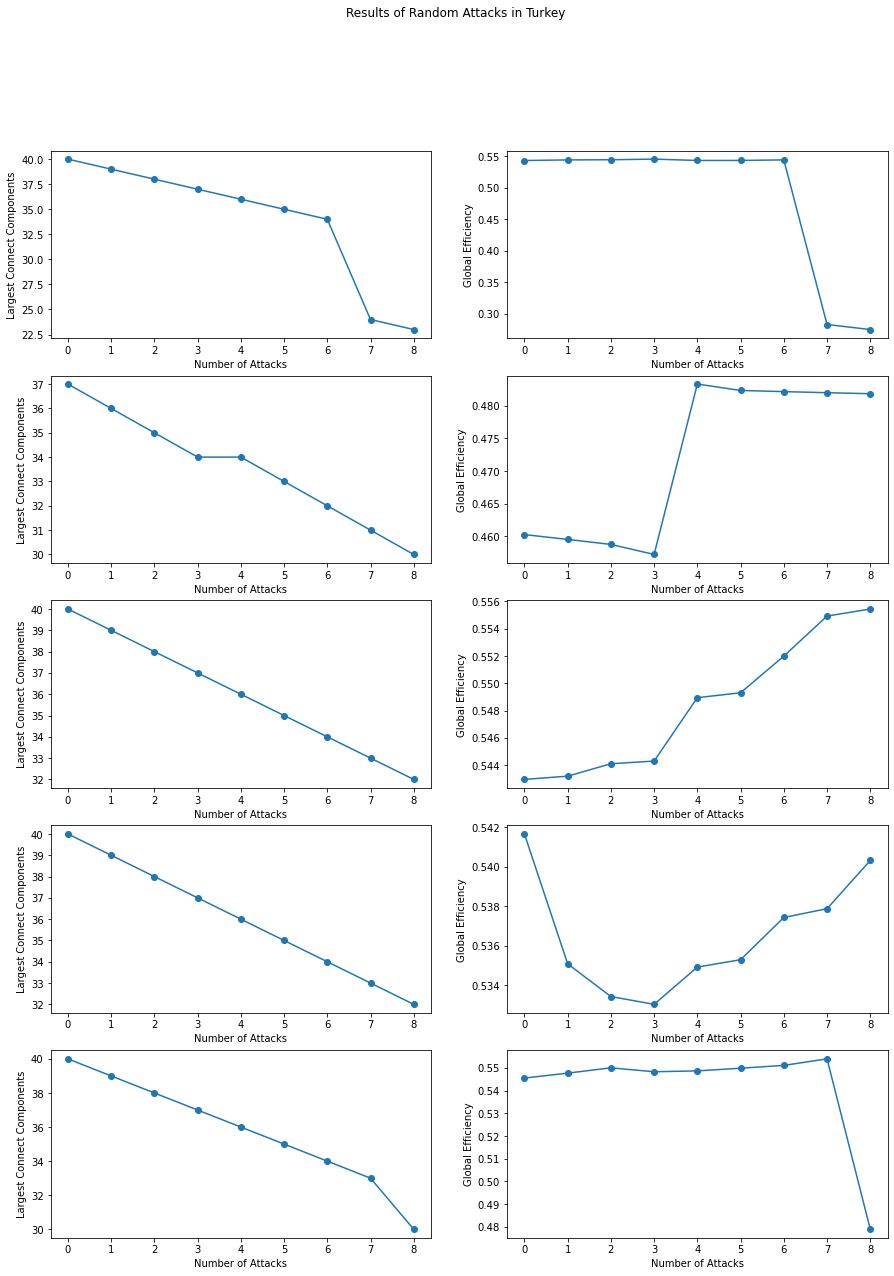

In [81]:
fig, axs = plt.subplots(5, 2, figsize=(15,20))
fig.suptitle("Results of Random Attacks in Turkey")

temp_iter = 0

for x in range(5):
  number_of_attack_list_turkey,largest_cc_list_turkey,gl_list_turkey = attack_turkey()
  print("ATTACK FINISHED ! \n")
  removed=list()

  sub_temp_iter = 0

  axs[temp_iter, sub_temp_iter].plot(number_of_attack_list_turkey, largest_cc_list_turkey, marker="o")
  axs[temp_iter, sub_temp_iter].set_xlabel("Number of Attacks")
  axs[temp_iter, sub_temp_iter].set_ylabel("Largest Connect Components")

  sub_temp_iter += 1

  axs[temp_iter, sub_temp_iter].plot(number_of_attack_list_turkey, gl_list_turkey, marker="o")
  axs[temp_iter, sub_temp_iter].set_xlabel("Number of Attacks")
  axs[temp_iter, sub_temp_iter].set_ylabel("Global Efficiency")

  temp_iter += 1

### America Random Node Attack Plots

 going to remove: Bellingham

This node is going to remove: Athens

This node is going to remove: Binghamton

This node is going to remove: Elko

This node is going to remove: Nightmute

This node is going to remove: Cordova

This node is going to remove: Burlington

This node is going to remove: Naples

This node is going to remove: Laramie

This node is going to remove: Cincinnati

This node is going to remove: Huntsville

This node is going to remove: Walla Walla

This node is going to remove: White Mountain

This node is going to remove: Birmingham

This node is going to remove: Knoxville

This node is going to remove: Los Angeles

This node is going to remove: Charlotte

This node is going to remove: Dallas-Fort Worth

This node is going to remove: Yakima

This node is going to remove: Barter Island

This node is going to remove: Austin

This node is going to remove: Toledo

This node is going to remove: Tulsa

ATTACK FINISHED ! 

<ipython-input-60-e1e7667f5575>:4: SettingWithCopy

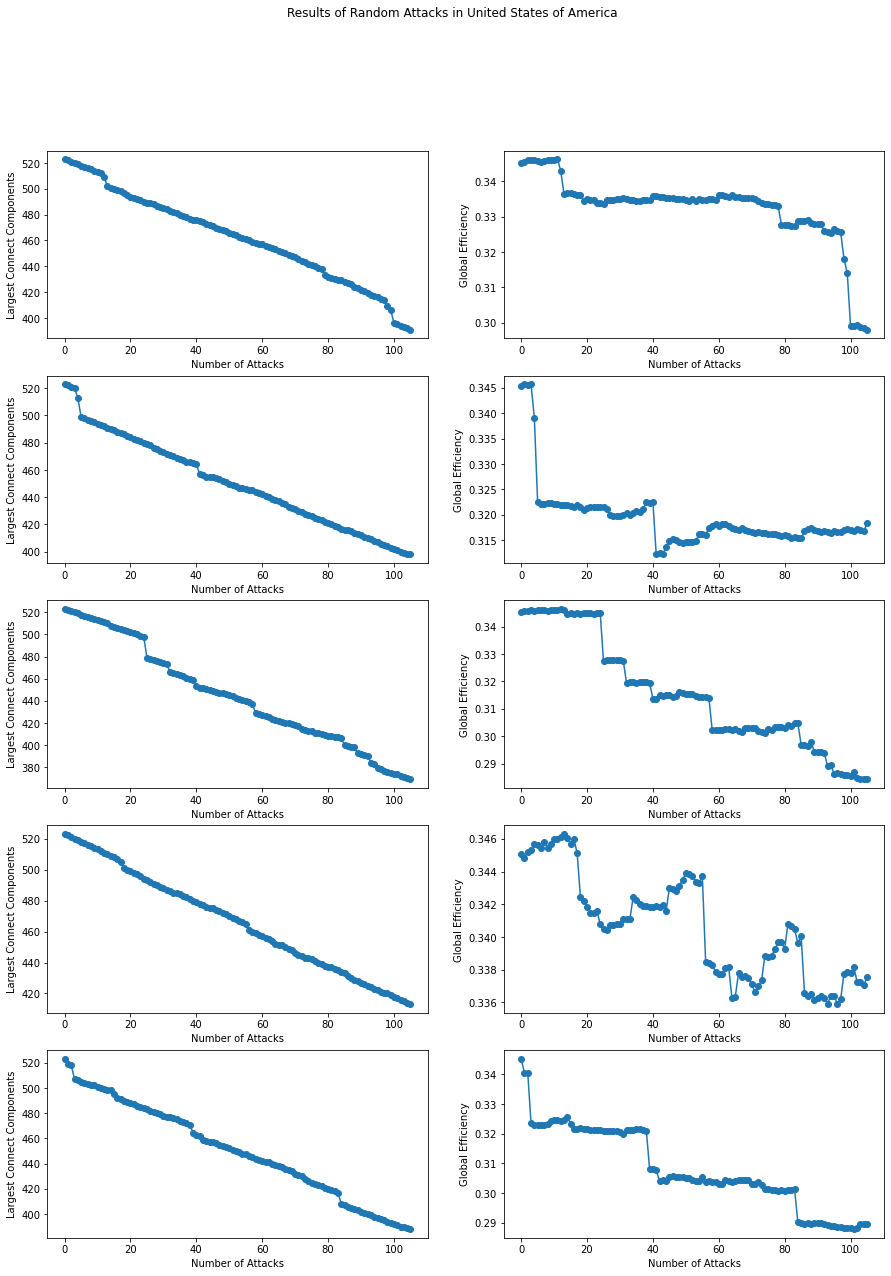

In [82]:
fig, axs = plt.subplots(5, 2, figsize=(15,20))
fig.suptitle("Results of Random Attacks in United States of America")

temp_iter = 0

for x in range(5):
  number_of_attack_list_usa,largest_cc_list_usa,gl_list_usa = attack_usa()
  print("ATTACK FINISHED ! \n")
  removed=list()

  sub_temp_iter = 0

  axs[temp_iter, sub_temp_iter].plot(number_of_attack_list_usa, largest_cc_list_usa, marker="o")
  axs[temp_iter, sub_temp_iter].set_xlabel("Number of Attacks")
  axs[temp_iter, sub_temp_iter].set_ylabel("Largest Connect Components")

  sub_temp_iter += 1

  axs[temp_iter, sub_temp_iter].plot(number_of_attack_list_usa, gl_list_usa, marker="o")
  axs[temp_iter, sub_temp_iter].set_xlabel("Number of Attacks")
  axs[temp_iter, sub_temp_iter].set_ylabel("Global Efficiency")

  temp_iter += 1

### China Random Node Attack Plots

<ipython-input-64-3e6ee3c050fa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  china_network.drop_duplicates(inplace=True)
This node is going to remove: Dandong

This node is going to remove: Mohe County

This node is going to remove: Yulin

This node is going to remove: Qingyang

This node is going to remove: Xinyuan

This node is going to remove: Jinghonggasa

This node is going to remove: Changchun

This node is going to remove: Jiagedaqi District

This node is going to remove: Daqing

This node is going to remove: Jining

This node is going to remove: Shijiazhuang

This node is going to remove: Quzhou

This node is going to remove: Liping

This node is going to remove: Hefei

This node is going to remove: Aksu

This node is going to remove: Enshi

This node is going to remove: Zhuhai

This node i

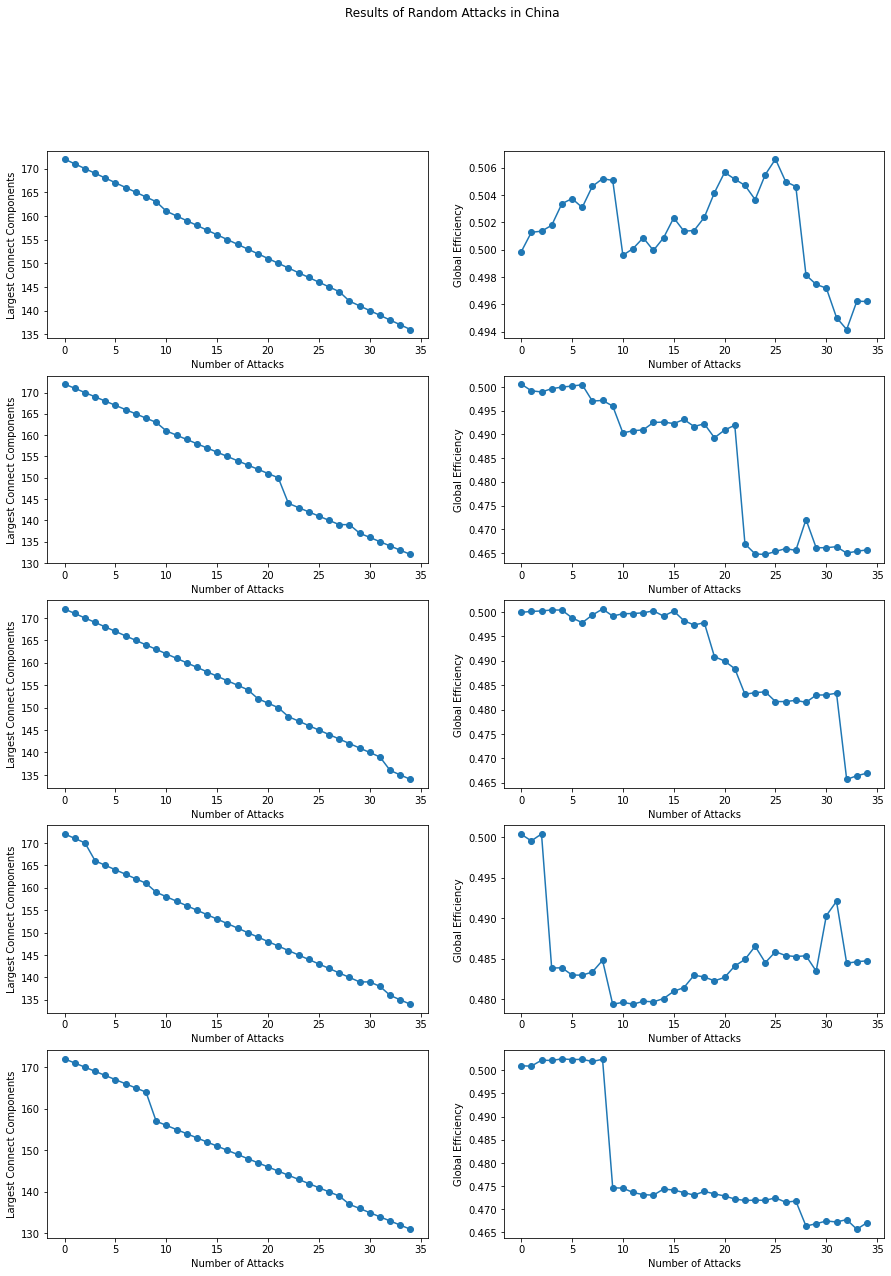

In [83]:
fig, axs = plt.subplots(5, 2, figsize=(15,20))
fig.suptitle("Results of Random Attacks in China")

temp_iter = 0

for x in range(5):
  number_of_attack_list_china,largest_cc_list_china,gl_list_china = attack_china()
  print("ATTACK FINISHED ! \n")
  removed=list()

  sub_temp_iter = 0

  axs[temp_iter, sub_temp_iter].plot(number_of_attack_list_china, largest_cc_list_china, marker="o")
  axs[temp_iter, sub_temp_iter].set_xlabel("Number of Attacks")
  axs[temp_iter, sub_temp_iter].set_ylabel("Largest Connect Components")

  sub_temp_iter += 1

  axs[temp_iter, sub_temp_iter].plot(number_of_attack_list_china, gl_list_china, marker="o")
  axs[temp_iter, sub_temp_iter].set_xlabel("Number of Attacks")
  axs[temp_iter, sub_temp_iter].set_ylabel("Global Efficiency")

  temp_iter += 1

## Plot Targeted Attack Results


Istanbul
Ankara
Izmir
Adana
Trabzon
<ipython-input-58-919843d5cb1a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  turkey_network.drop_duplicates(inplace=True)


Text(0, 0.5, 'Largest Degree of Network')

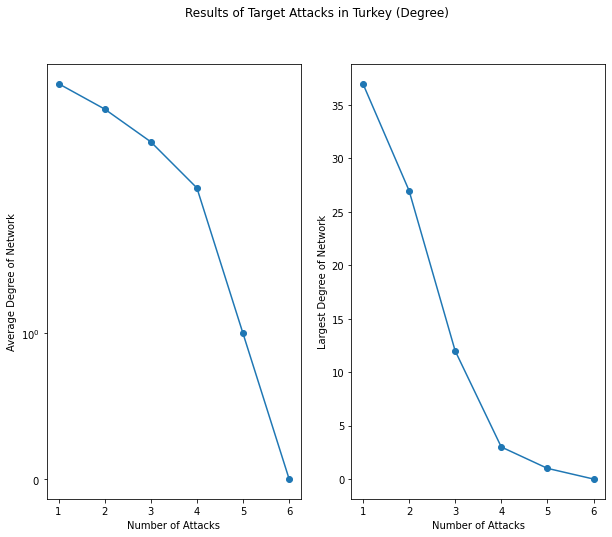

In [105]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10,8))
#fig.suptitle("Results of Target Attacks in Turkey (Closeness Centrality)")
fig.suptitle("Results of Target Attacks in Turkey (Degree)")

average_degree_turkey_list,largest_degree_turkey_list,counter_turkey_list = targeted_turkey()

counter_turkey_list.sort(reverse=True)
average_degree_turkey_list.sort()
largest_degree_turkey_list.sort()

ax1.plot(counter_turkey_list, average_degree_turkey_list, marker="o")
ax1.set_xlabel("Number of Attacks")
ax1.set_ylabel("Average Degree of Network")
ax1.set_yscale("symlog")

ax2.plot(counter_turkey_list, largest_degree_turkey_list, marker="o")
ax2.set_xlabel("Number of Attacks")
ax2.set_ylabel("Largest Degree of Network")

<ipython-input-60-e1e7667f5575>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_network.drop_duplicates(inplace=True)
Nodes: 528
Edges: 2559
Density: 0.01839313437985165
The graph is not strongly connected
Chicago
Denver
Atlanta
Dallas-Fort Worth
Minneapolis
Las Vegas
Detroit
Houston
Washington
Charlotte
Philadelphia
Salt Lake City
Los Angeles
New York
Seattle
Phoenix
Orlando
San Francisco
Newark
Boston
Baltimore
Tampa
Fort Lauderdale
Portland
St. Louis
Cleveland
San Diego
Miami
Sanford
Nashville
Cincinnati
Kansas City
Austin
Anchorage
New Orleans
Oakland
Mesa
Raleigh-durham
St. Petersburg
Columbus
Memphis
Indianapolis
Pittsburgh
Fort Myers
San Antonio
Honolulu
Milwaukee
Sacramento
San Jose
Dallas
Bethel
Myrtle Beach
Windsor Locks
Albuquerque
Oklahoma City
Jacksonville
Louisville
Grand Rapids
Kahu

Text(0, 0.5, 'Largest Degree of Network')

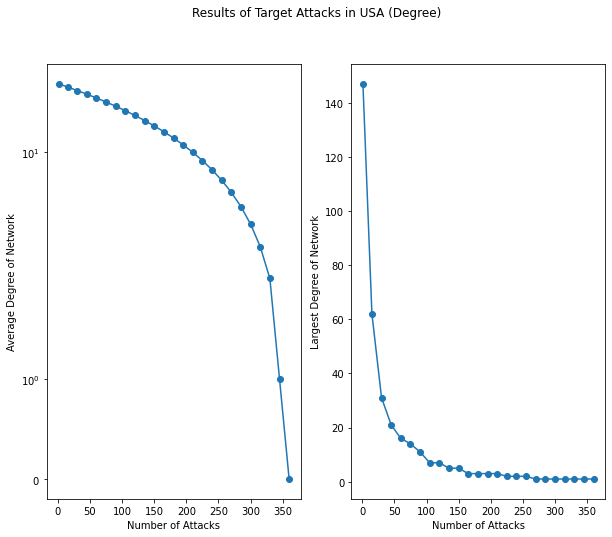

In [106]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10,8))
fig.suptitle("Results of Target Attacks in USA (Degree)")

average_degree_usa_list,largest_degree_usa_list,counter_usa_list = targeted_usa()

counter_usa_list.sort(reverse=True)
average_degree_usa_list.sort()
largest_degree_usa_list.sort()

ax1.plot(counter_usa_list, average_degree_usa_list, marker="o")
ax1.set_xlabel("Number of Attacks")
ax1.set_ylabel("Average Degree of Network")
ax1.set_yscale("symlog")

ax2.plot(counter_usa_list, largest_degree_usa_list, marker="o")
ax2.set_xlabel("Number of Attacks")
ax2.set_ylabel("Largest Degree of Network")

<ipython-input-64-3e6ee3c050fa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  china_network.drop_duplicates(inplace=True)
Largest degree of the network: 118
Beijing
Largest degree of the network: 93
Shanghai
Largest degree of the network: 92
Guangzhou
Largest degree of the network: 80
Chengdu
Largest degree of the network: 74
Xi'an
Largest degree of the network: 67
Chongqing
Largest degree of the network: 66
Shenzhen
Largest degree of the network: 62
Kunming
Largest degree of the network: 49
Changcha
Largest degree of the network: 44
Xiamen
Largest degree of the network: 42
Hangzhou
Largest degree of the network: 41
Wuhan
Largest degree of the network: 36
Dalian
Largest degree of the network: 35
Shenyang
Largest degree of the network: 34
Zhengzhou
Largest degree of the network: 33
Harbin
Largest deg

Text(0, 0.5, 'Largest Degree of Network')

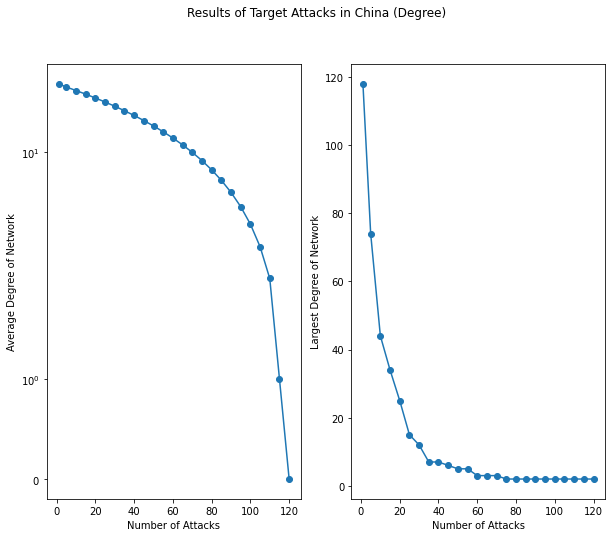

In [104]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10,8))
fig.suptitle("Results of Target Attacks in China (Degree)")

average_degree_china_list,largest_degree_china_list,counter_china_list = targeted_china()

counter_china_list.sort(reverse=True)
average_degree_china_list.sort()
largest_degree_china_list.sort()

ax1.plot(counter_china_list, average_degree_china_list, marker="o")
ax1.set_xlabel("Number of Attacks")
ax1.set_ylabel("Average Degree of Network")
ax1.set_yscale("symlog")

ax2.plot(counter_china_list, largest_degree_china_list, marker="o")
ax2.set_xlabel("Number of Attacks")
ax2.set_ylabel("Largest Degree of Network")